<img src="https://github.com/djp840/MSDS_432_Public/blob/main/images/NorthwesternHeader.png?raw=1">

## MSDS432 - Assignment 01 - Comparing Search Algorithm Performance

### Import Packages

In [1]:
import random
import datetime
import time
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
SEED = 213

### Mount Google Drive to Colab Environment

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')

### Bhargava's Binary Search

In [3]:
def binary_search(mylist, item):
    start_time = (datetime.datetime.now())
    low = 0
    high =len(mylist) - 1 
    count = 0
    while low <= high:
        mid = (low + high)
        guess = mylist[mid]
        if guess == item:
            return mid
        if guess > item:
            high = mid - 1
        else:
            low = mid + 1
        count+=1
    return None

### Linear Search

In [4]:
def linear_search(mylist, item):
    for i in range(len(mylist)):
        if mylist[i]==item:
            return i
    return None

### Generate list of specified length using constant random seed

In [5]:
def generate_list(length):
    returnable_list = []
    random.seed(SEED)
    for i in range(0, length):
        returnable_list.append(random.randint(0, 1000))
    return returnable_list

### Create Random Lists  
multiplied list length by 1000 to return results greater than 0.0000

In [6]:
random_lists = []
random_lists.append(generate_list(512 * 1000))
random_lists.append(generate_list(1024 * 1000))
random_lists.append(generate_list(2048 * 1000))
random_lists.append(generate_list(4096 * 1000))
random_lists.append(generate_list(8192 * 1000))

In [7]:
returnable = []
for i in range(0, 100):
    returnable.append(random.randint(0,1000))

### Arrays to store sort time, linear search time, and binary search time

In [8]:
sort_times = []
linear_times = []
binary_times = []

for list_item in random_lists:
    start_time = (datetime.datetime.now())
    list_item.sort()
    sort_times.append((datetime.datetime.now() - start_time).
                      total_seconds() * 1000)
    
    linear_start = datetime.datetime.now()
    linear_search(list_item, list_item[-1])
    linear_times.append((datetime.datetime.now() - linear_start).
                      total_seconds() * 1000)
    
    binary_start = datetime.datetime.now()
    binary_search(list_item, list_item[-1])
    binary_times.append((datetime.datetime.now() - binary_start)
                        .total_seconds() * 1000)

In [9]:
array_length = []
for l in range(len(random_lists)):
    array_length.append(len(random_lists[l]))

### Define dataframe with array length, sort time, linear search, and binary search

In [10]:
time_df = {'array length':array_length,
          'sort time': sort_times,
          'linear search': linear_times,
          'binary search': binary_times}
time_df = pd.DataFrame(data=time_df)

### Calculate combined search and sort execution times, and add to dataframe

In [11]:
time_df['total linear'] = time_df['sort time'] + time_df['linear search']
time_df['total binary'] = time_df['sort time'] + time_df['binary search']
time_df

,array length,sort time,linear search,binary search,total linear,total binary
0,512000,147.681,54.721,0.007,202.402,147.688
1,1024000,274.231,118.686,0.006,392.917,274.237
2,2048000,556.001,228.543,0.007,784.544,556.008
3,4096000,1112.201,458.268,0.007,1570.469,1112.208
4,8192000,2249.072,937.074,0.006,3186.146,2249.078


### Plot results without sort time

Text(0.5, 1.0, 'Fig 1: Execution Time by Search Type')

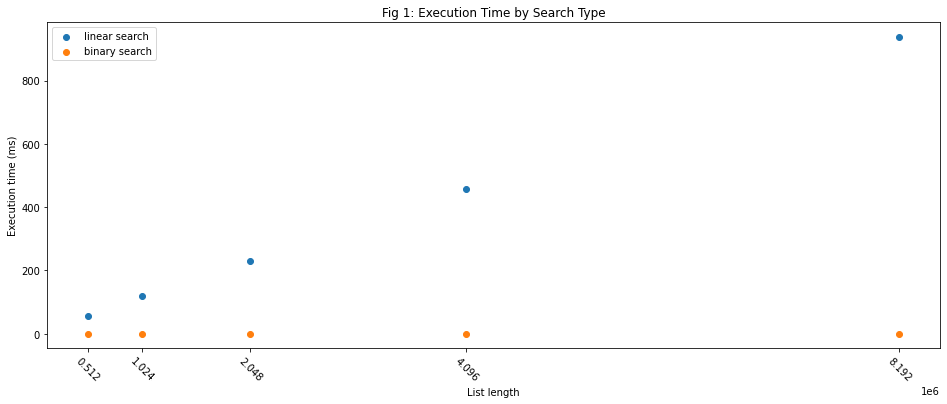

In [12]:
plt.figure(figsize=(16, 6))
plt.scatter(time_df['array length'], [time_df['linear search']])
plt.scatter(time_df['array length'], [time_df['binary search']])
plt.legend(('linear search', 'binary search'))
plt.xticks(time_df['array length'], rotation=-45)
plt.ylabel('Execution time (ms)')
plt.xlabel('List length')
plt.title('Fig 1: Execution Time by Search Type')

### Plot results with sort time

Text(0.5, 1.0, 'Fig 2: Execution Time by Search Type (Sort Time Included)')

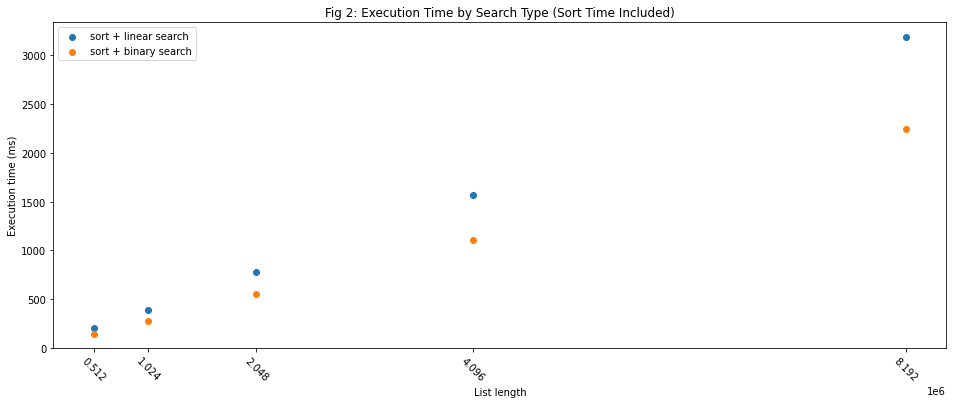

In [13]:
plt.figure(figsize=(16, 6))
plt.scatter(time_df['array length'], [time_df['total linear']])
plt.scatter(time_df['array length'], [time_df['total binary']])
plt.legend(('sort + linear search',
            'sort + binary search'))
plt.xticks(time_df['array length'], rotation=-45)
plt.ylabel('Execution time (ms)')
plt.xlabel('List length')
plt.title('Fig 2: Execution Time by Search Type (Sort Time Included)')